#### packages

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [5]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [6]:
df_copy = df.copy()
비수도권 = df_copy[(df_copy['사업체지역']!='서울')&(df_copy['사업체지역']!='경기')].copy()

In [7]:
model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태,Treatment('건강하지않다'))''', 비수도권).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.355767
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2679
Method:                           MLE   Df Model:                            4
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                  0.1218
Time:                        17:52:00   Log-Likelihood:                -954.88
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 3.892e-56
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -12.8208      0.777    -16.499      0.000     -14.344     -11.298
C(성별, Treatment("여자"))[T.남자]            -0.2492      0.136     -1.831      0.067      -0.516       0.018
C(건강상태, Treatment('건강하지않다'))[T.건강하다]     0.1431      0.192      0.745      0.456      -0.233       0.520
C(건강상태, Treatment('건강하지않다'))[T.보통이다]    -0.0228      0.214     -0.106      0.915      -0.443       0.397
age                                      0.4170      0.029     14.248      0.000       0.360       0.474
========================================================================================================
"""

In [9]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1919.7556935531031




,OR,Lower CI,Upper CI
Intercept,0.00000,0.00000,0.00001
"C(성별, Treatment(""여자""))[T.남자]",0.77939,0.59690,1.01767
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.15390,0.79185,1.68149
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.97749,0.64236,1.48747
age,1.51746,1.43285,1.60706


In [10]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) 
                                + C(건강상태,Treatment("건강하지않다")) 
    + C(전공일치,Treatment("맞지않다")) + 학점 + C(재학중일자리경험,Treatment('없다'))''', 비수도권).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.338387
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2561
Method:                           MLE   Df Model:                            8
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                  0.1647
Time:                        17:54:31   Log-Likelihood:                -869.65
converged:                       True   LL-Null:                       -1041.1
Covariance Type:            nonrobust   LLR p-value:                 2.924e-69
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -11.7598      0.870    -13.511      0.000     -13.466     -10.054
C(성별, Treatment("여자"))[T.남자]            -0.3086      0.144     -2.136      0.033      -0.592      -0.025
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.0068      0.200      0.034      0.973      -0.385       0.398
C(건강상태, Treatment("건강하지않다"))[T.보통이다]    -0.1090      0.224     -0.487      0.626      -0.548       0.330
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.0483      0.163      0.297      0.767      -0.271       0.367
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.5694      0.144      3.959      0.000       0.287       0.851
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.9705      0.128     -7.581      0.000      -1.221      -0.720
나이                                       0.4267      0.031     13.769      0.000       0.366       0.487
학점                                      -0.3254      0.123     -2.639      0.008      -0.567      -0.084
========================================================================================================
"""

In [11]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1757.309477950748




,OR,Lower CI,Upper CI
Intercept,0.00001,0.00000,0.00004
"C(성별, Treatment(""여자""))[T.남자]",0.73449,0.55335,0.97493
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.00684,0.68060,1.48944
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",0.89676,0.57838,1.39040
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.04947,0.76290,1.44368
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.76718,1.33306,2.34267
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.37889,0.29481,0.48695
나이,1.53220,1.44191,1.62815
학점,0.72222,0.56714,0.91970


In [12]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(전공일치,Treatment('맞지않다'))
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', 비수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.328025
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2553
Method:                           MLE   Df Model:                           16
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                  0.1903
Time:                        17:57:38   Log-Likelihood:                -843.02
converged:                       True   LL-Null:                       -1041.1
Covariance Type:            nonrobust   LLR p-value:                 2.288e-74
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   -10.9535      0.897    -12.210      0.000     -12.712      -9.195
C(성별, Treatment('여자'))[T.남자]                 -0.2653      0.147     -1.802      0.072      -0.554       0.023
C(건강상태, Treatment('건강하지않다'))[T.건강하다]         -0.2526      0.217     -1.165      0.244      -0.678       0.172
C(건강상태, Treatment('건강하지않다'))[T.보통이다]         -0.2191      0.230     -0.952      0.341      -0.670       0.232
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.0029      0.166      0.018      0.986      -0.323       0.329
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.3131      0.150      2.093      0.036       0.020       0.606
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.0034      0.131     -7.687      0.000      -1.259      -0.748
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.0583      0.278     -0.209      0.834      -0.604       0.487
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]       0.0658      0.223      0.295      0.768      -0.372       0.503
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.3770      0.360     -1.046      0.296      -1.083       0.329
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.1048      0.246     -0.427      0.670      -0.586       0.377
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -0.0121      0.314     -0.039      0.969      -0.628       0.604
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -0.2203      0.220     -1.002      0.316      -0.651       0.210
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.2698      0.243     -5.221      0.000      -1.746      -0.793
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.6972      0.144     -4.837      0.000      -0.980      -0.415
나이                                            0.4232      0.032     13.340      0.000       0.361       0.485
학점                                           -0.3091      0.126     -2.461      0.014      -0.555      -0.063
=============================================================================================================
"""

In [13]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1720.047699084708




,OR,Lower CI,Upper CI
Intercept,0.00002,0.00000,0.00010
"C(성별, Treatment('여자'))[T.남자]",0.76695,0.57468,1.02354
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",0.77679,0.50787,1.18811
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",0.80325,0.51170,1.26091
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.00293,0.72394,1.38944
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.36772,1.02007,1.83385
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.36661,0.28385,0.47350
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.94338,0.54671,1.62788
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",1.06803,0.68955,1.65424
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",0.68591,0.33845,1.39007


In [ ]:
odds_ratios.index = ['절편', '성별 Ref:여자|남자',
       '건강상태 Ref:건강하지않다|건강하다',
       '건강상태 Ref:건강하지않다|보통이다',
       '대학지역,Ref:비수도권|수도권',
       '전공일치 Ref:맞지않다|보통이다',
       '전공일치 Ref:맞지않다|잘맞다',
       '재학중일자리경험 Ref:없다|있다',
       '삶의만족도_개인 REF:그렇지않다|그렇다',
       '삶의만족도_개인 REF:그렇지않다|보통이다',
       '삶의만족도_관계 REF:그렇지않다|그렇다',
       '삶의만족도_관계 REF:그렇지않다|보통이다',
       '삶의만족도_소속집단 REF:그렇지않다|그렇다',
       '삶의만족도_소속집단 REF:그렇지않다|보통이다',
       '업무만족도 REF:그렇지않다|그렇다',
       '업무만족도 REF:그렇지않다|보통이다', '나이', '학점']

In [16]:
odds_ratios['label'] = odds_ratios.index
odds_ratios.shape

(18, 4)

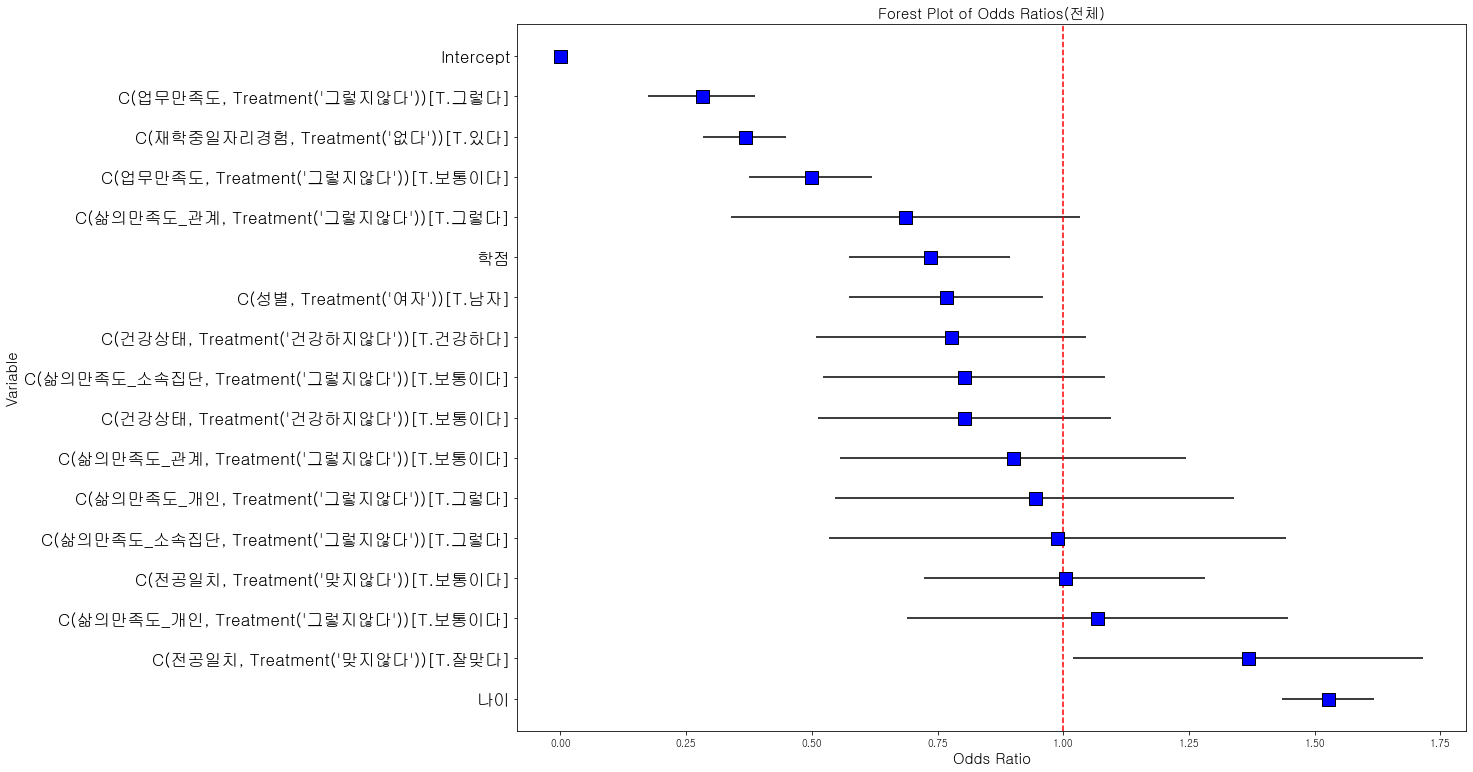

In [14]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(전체)', fontsize=15)

# Show the plot
plt.show()

##### 단변량------------------------------------------------------

In [15]:
ag = sm.Logit.from_formula('''LongWork2 ~ age''', 비수도권).fit()
print(ag.summary())
# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": ag.params,
        "Lower CI": ag.conf_int()[0],
        "Upper CI": ag.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.356590
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                  0.1198
Time:                        18:13:40   Log-Likelihood:                -957.09
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 1.308e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3155      0.710    -17.339      0.000     -13.708     -10.923
age            0.3959      0.

,OR,Lower CI,Upper CI
Intercept,0.00000,0.00000,0.00002
age,1.48576,1.41134,1.56410


In [16]:
se = sm.Logit.from_formula('''LongWork2 ~ C(성별,Treatment("여자"))''', 비수도권).fit()
print(se.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": se.params,
        "Lower CI": se.conf_int()[0],
        "Upper CI": se.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.399150
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01475
Time:                        18:14:05   Log-Likelihood:                -1071.3
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 1.481e-08
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.1600      0.088    -24.458      0.000

,OR,Lower CI,Upper CI
Intercept,0.11532,0.09699,0.13712
"C(성별, Treatment(""여자""))[T.남자]",1.89178,1.51257,2.36606


In [17]:
model = sm.Logit.from_formula('''LongWork2 ~ C(건강상태,Treatment('건강하지않다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.404252
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.002157
Time:                        18:14:29   Log-Likelihood:                -1085.0
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                   0.09576
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.9935      0.1

,OR,Lower CI,Upper CI
Intercept,0.13621,0.09829,0.18876
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.31173,0.92146,1.86731
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.03184,0.69443,1.53318


In [18]:
model = sm.Logit.from_formula('''LongWork2 ~ C(전공일치,Treatment('맞지않다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.400996
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01019
Time:                        18:15:11   Log-Likelihood:                -1076.3
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 1.536e-05
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -2.0785      0.091    

,OR,Lower CI,Upper CI
Intercept,0.12511,0.10475,0.14943
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.27711,0.95976,1.69939
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.82760,1.42188,2.34909


In [19]:
model = sm.Logit.from_formula('''LongWork2 ~ 학점''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.403917
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2568
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.002931
Time:                        18:15:42   Log-Likelihood:                -1038.1
converged:                       True   LL-Null:                       -1041.1
Covariance Type:            nonrobust   LLR p-value:                   0.01350
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0299      0.308     -3.339      0.001      -1.634      -0.425
학점            -0.2776      0.

,OR,Lower CI,Upper CI
Intercept,0.35706,0.19508,0.65352
학점,0.75763,0.61299,0.93640


In [20]:
model = sm.Logit.from_formula('''LongWork2 ~ C(재학중일자리경험,Treatment('없다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.392178
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03196
Time:                        18:16:06   Log-Likelihood:                -1052.6
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 7.631e-17
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.3663      0.072    

,OR,Lower CI,Upper CI
Intercept,0.25505,0.22134,0.29388
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.39008,0.31112,0.48906


In [21]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_개인,Treatment('그렇지않다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.401681
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.008504
Time:                        18:16:26   Log-Likelihood:                -1078.1
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 9.643e-05
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.6565

,OR,Lower CI,Upper CI
Intercept,0.19080,0.16798,0.21671
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.54268,0.37958,0.77587
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.63392,0.46721,0.86012


In [22]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_관계,Treatment('그렇지않다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.402716
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.005949
Time:                        18:17:03   Log-Likelihood:                -1080.9
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                  0.001551
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.7014

,OR,Lower CI,Upper CI
Intercept,0.18243,0.16121,0.20645
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",0.53916,0.34823,0.83478
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]",0.69147,0.50893,0.93949


In [23]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_소속집단,Treatment('그렇지않다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.402211
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.007196
Time:                        18:18:02   Log-Likelihood:                -1079.5
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 0.0003999
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -

,OR,Lower CI,Upper CI
Intercept,0.18899,0.16625,0.21483
"C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]",0.57515,0.38631,0.85630
"C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]",0.64138,0.48356,0.85069


In [24]:
model = sm.Logit.from_formula('''LongWork2 ~ C(업무만족도,Treatment('그렇지않다'))''', 비수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.390636
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03577
Time:                        18:21:06   Log-Likelihood:                -1048.5
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 1.288e-17
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.3770      0.0

,OR,Lower CI,Upper CI
Intercept,0.25233,0.21927,0.29037
"C(업무만족도, Treatment('그렇지않다'))[T.그렇다]",0.24048,0.15684,0.36873
"C(업무만족도, Treatment('그렇지않다'))[T.보통이다]",0.45646,0.35747,0.58286
